# **HR Analytics**

## **Business Understanding**
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because **it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates**. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

## **Descriptive Analytics**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)

In [250]:
df = pd.read_csv('aug_train.csv')

### Basic Information

In [251]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [253]:
df.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [254]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## **Data Preparation for EDA**

The missing values in this data are not the ones that can be easily to impute, because if you restore incorrectly, you may actually see non-existent correlations and, in general, the data logic may be lost. Therefore, the EDA will be performed on all available data, and for modeling, all rows with missing values will be deleted.

In [255]:
df = df.drop(columns=['enrollee_id', 'city'])

In [256]:
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [257]:
for i in range(len(df.index)):
    if df['company_size'][i] == '10/49':
        df['company_size'][i] = '10-49'

In [258]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [259]:
for i in range(len(df.index)):
    if df['experience'][i] == '>20':
        df['experience'][i] = '21'
    elif df['experience'][i] == '<1':
        df['experience'][i] = '0'

In [260]:
df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [261]:
for i in range(len(df.index)):
    if df['last_new_job'][i] == '>4':
        df['last_new_job'][i] = '5'
    elif df['last_new_job'][i] == 'never':
        df['last_new_job'][i] = '0'

In [262]:
retarget = {
    0.0: 'Not looking for job change',
    1.0: 'Looking for job change'
}
df['target'] = df['target'].map(retarget)

## **Exploratory Data Analysis**

In [264]:
target = df.groupby('target').agg({'target': 'count'}).rename(columns={'target': 'count'}).reset_index()

fig = px.pie(target, values='count', names='target')
fig.update_traces(
    textposition = 'inside',
    textinfo = 'percent + label',
    hole = 0.5,
    marker = dict(colors = ['#32384D', '#E29930'], line = dict(color = 'white', width = 2))
)

fig.update_layout(
    title_text = 'Job Search',
    title_x = 0.5,
    title_y = 0.5,
    title_font_size = 32,
    title_font_family = 'Calibri Black',
    title_font_color = 'black',
    showlegend = False
)

fig.show()

### Distribution of job changing by gender, relevet experience, education, enrolled university, major discipline and company type

In [265]:
# Gender
gender = df.groupby(['gender', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

# Experience
experience = df.groupby(['relevent_experience', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

# Education Level
education_level = df.groupby(['education_level', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

# Enrolled University
enrolled = df.groupby(['enrolled_university', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

# Major Discipline
major_discipline = df.groupby(['major_discipline', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

# Company Type
company_type = df.groupby(['company_type', 'target']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

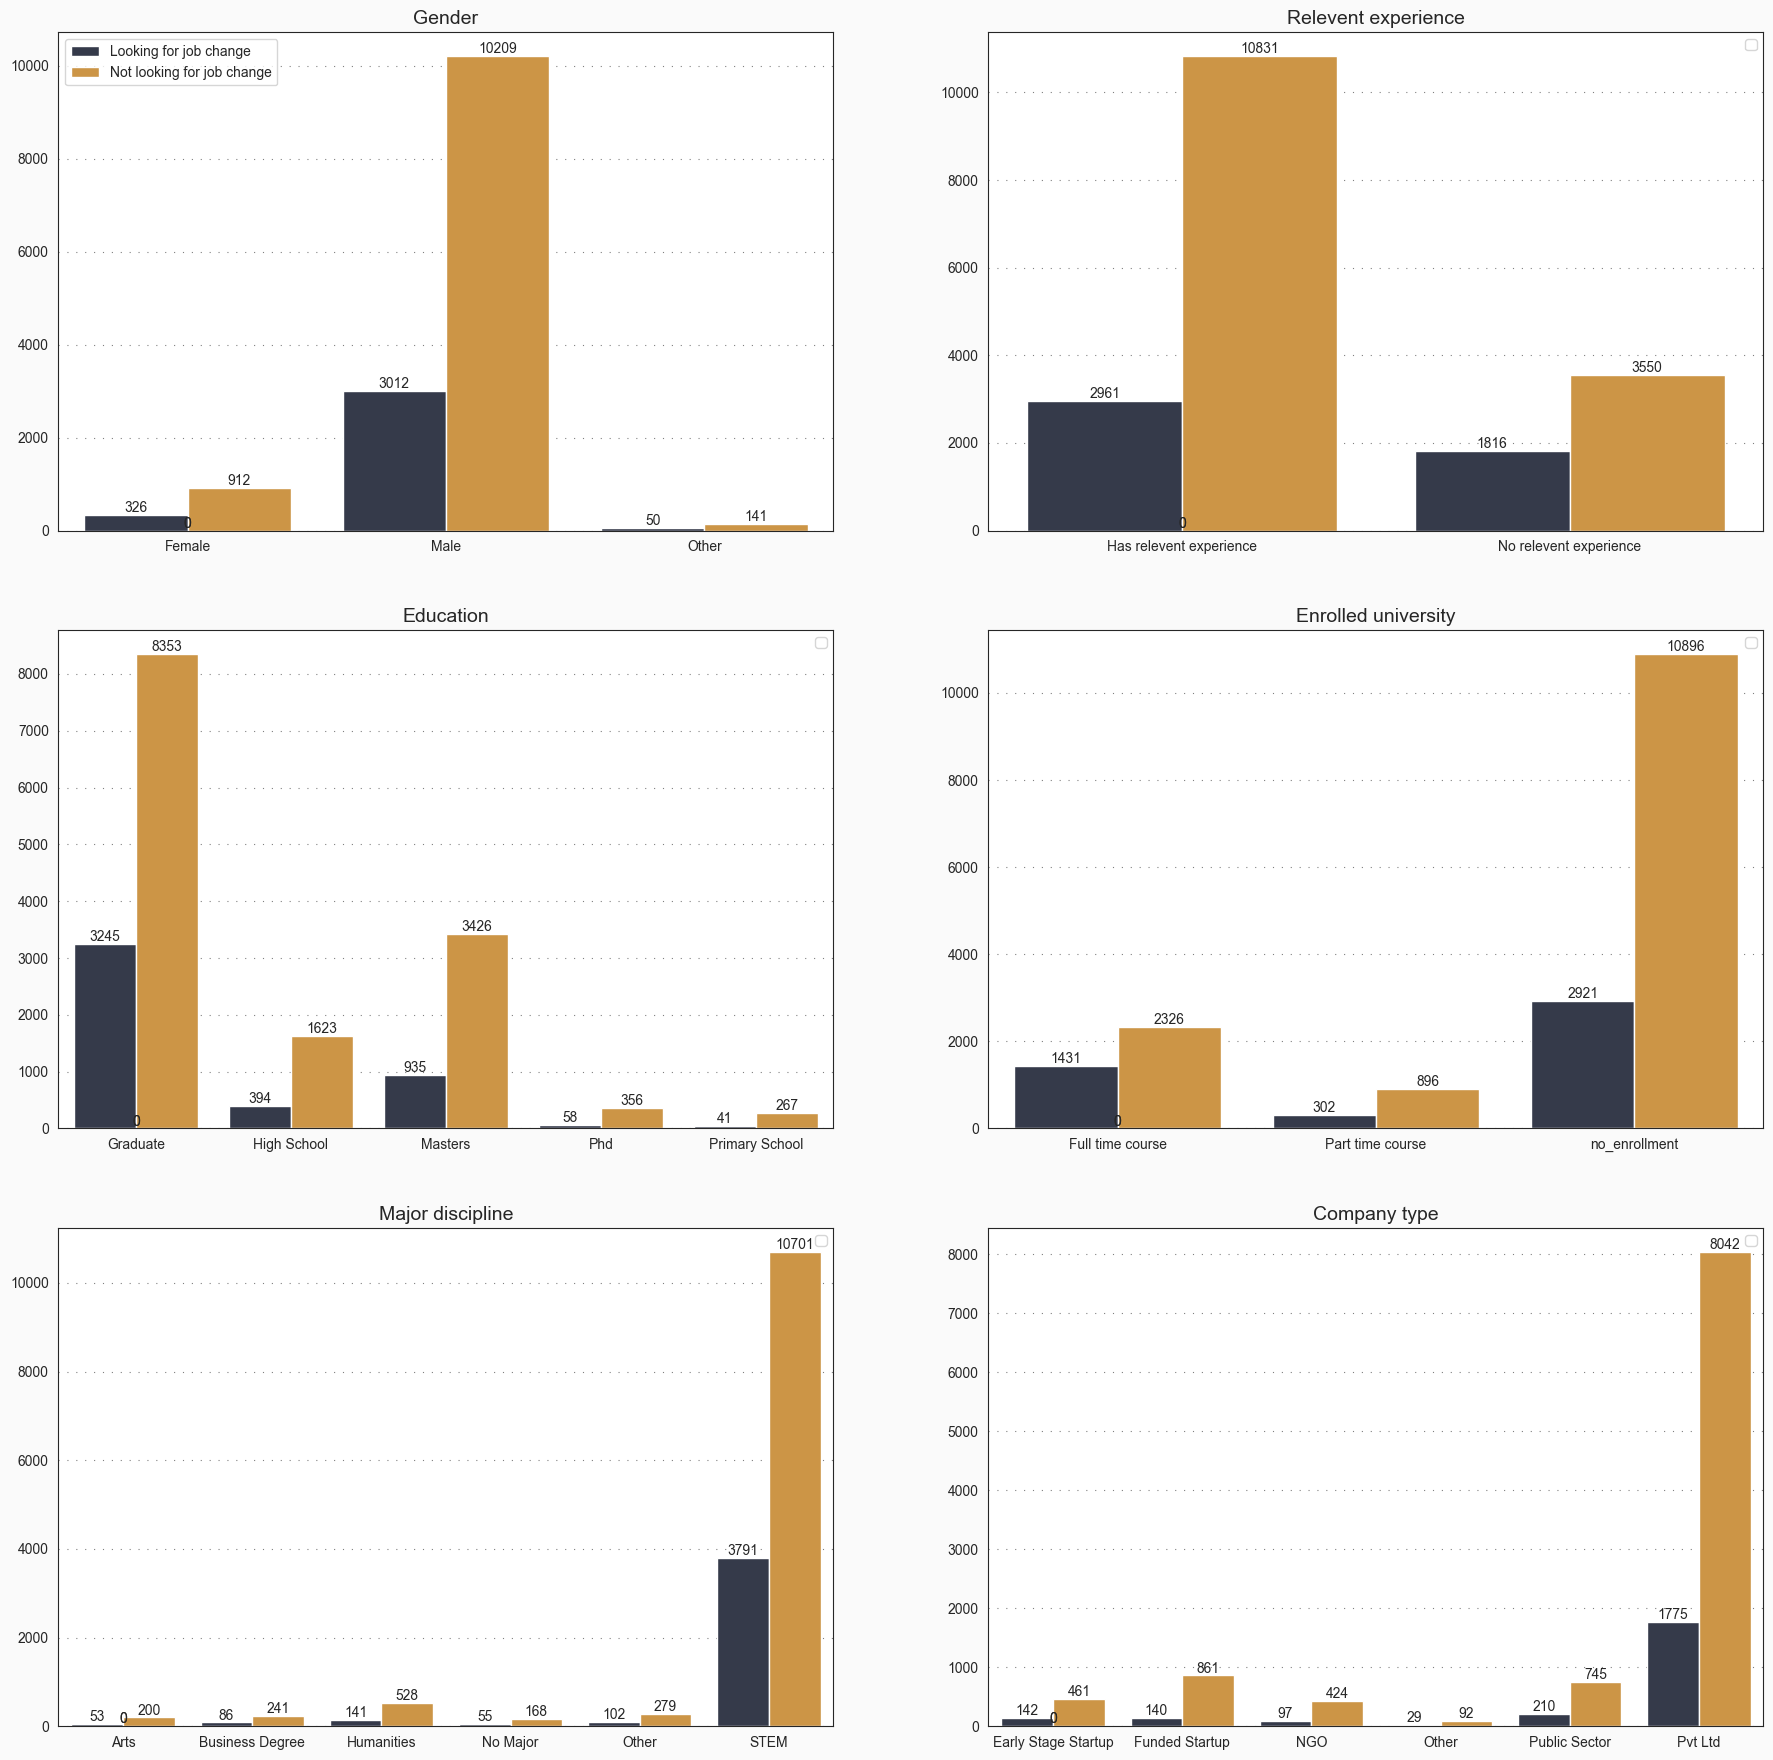

In [266]:
fig = plt.figure(figsize = (22, 22))
fig.patch.set_facecolor('#fafafa')

plt.subplot(321)
sns.set_style('white')
plt.title('Gender', size = 14)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a = sns.barplot(data = gender, x = gender['gender'], y = gender['count'], hue = gender['target'], palette = ['#32384D', '#E29930'])
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc = 'upper left')

plt.subplot(322)
plt.title('Relevent experience', size = 14)
a2 = sns.barplot(data = experience, x = experience['relevent_experience'], y = experience['count'], hue = experience['target'], palette = ['#32384D', '#E29930'])
for p in a2.patches:
    height = p.get_height()
    a2.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(323)
plt.title('Education', size = 14)
a3 = sns.barplot(data = education_level, x = education_level['education_level'], y = education_level['count'], hue = education_level['target'], palette = ['#32384D', '#E29930'])
for p in a3.patches:
    height = p.get_height()
    a3.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(324)
plt.title('Enrolled university', size = 14)
a4 = sns.barplot(data = enrolled, x = enrolled['enrolled_university'], y = enrolled['count'], hue = enrolled['target'], palette = ['#32384D', '#E29930'])
for p in a4.patches:
    height = p.get_height()
    a4.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(325)
plt.title('Major discipline', size = 14)
a5 = sns.barplot(data = major_discipline, x = major_discipline['major_discipline'], y = major_discipline['count'], hue = major_discipline['target'], palette = ['#32384D', '#E29930'])
for p in a5.patches:
    height = p.get_height()
    a5.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(326)
plt.title('Company type', size = 14)
a6 = sns.barplot(data = company_type, x = company_type['company_type'], y = company_type['count'], hue = company_type['target'], palette = ['#32384D', '#E29930'])
for p in a6.patches:
    height = p.get_height()
    a6.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.show()

In [267]:
def percent(data):
    data['percent'] = 0
    for i in range(len(data.index)):
        if data.index[i] % 2 == 0:
            data.iloc[i, 3] = round((data.iloc[i, 2] / (data.iloc[i, 2] + data.iloc[i+1, 2])) * 100, 1)
        else:
            data.iloc[i, 3] = round((data.iloc[i, 2] / (data.iloc[i, 2] + data.iloc[i-1, 2])) * 100, 1)
            
percent(gender)
percent(experience)
percent(education_level)
percent(enrolled)
percent(major_discipline)
percent(company_type)

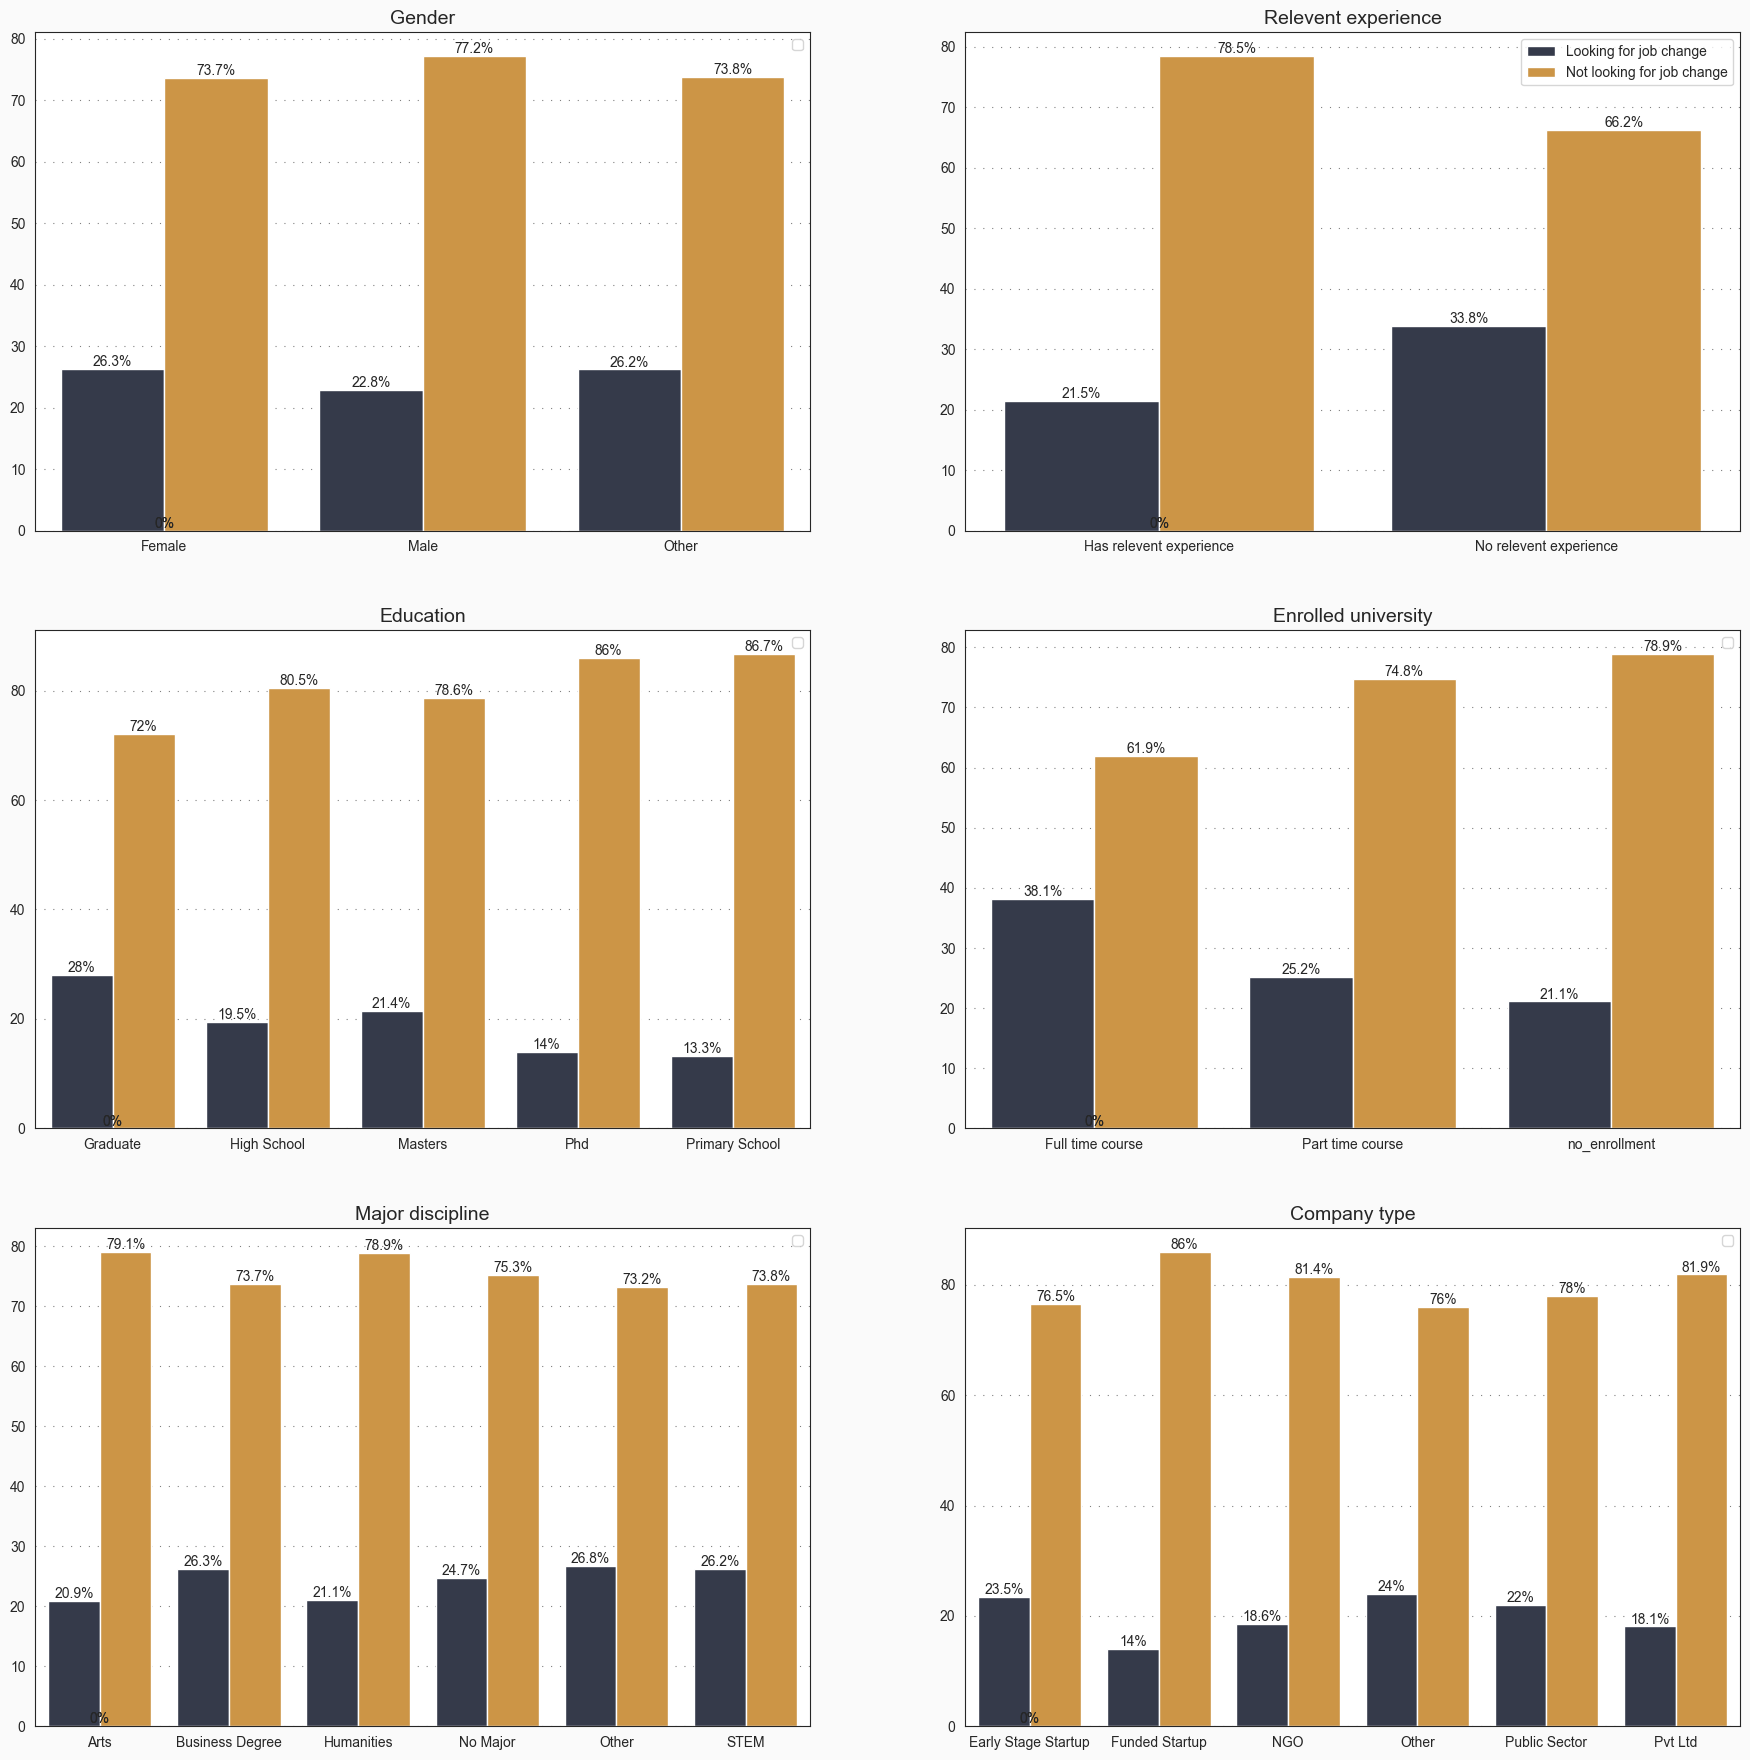

In [268]:
fig = plt.figure(figsize = (22, 22))
fig.patch.set_facecolor('#fafafa')

plt.subplot(321)
sns.set_style('white')
plt.title('Gender', size = 14)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a = sns.barplot(data = gender, x = gender['gender'], y = gender['percent'], hue = gender['target'], palette = ['#32384D', '#E29930'])
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(322)
plt.title('Relevent experience', size = 14)
a2 = sns.barplot(data = experience, x = experience['relevent_experience'], y = experience['percent'], hue = experience['target'], palette = ['#32384D', '#E29930'])
for p in a2.patches:
    height = p.get_height()
    a2.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend(loc = 'upper right')

plt.subplot(323)
plt.title('Education', size = 14)
a3 = sns.barplot(data = education_level, x = education_level['education_level'], y = education_level['percent'], hue = education_level['target'], palette = ['#32384D', '#E29930'])
for p in a3.patches:
    height = p.get_height()
    a3.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(324)
plt.title('Enrolled university', size = 14)
a4 = sns.barplot(data = enrolled, x = enrolled['enrolled_university'], y = enrolled['percent'], hue = enrolled['target'], palette = ['#32384D', '#E29930'])
for p in a4.patches:
    height = p.get_height()
    a4.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(325)
plt.title('Major discipline', size = 14)
a5 = sns.barplot(data = major_discipline, x = major_discipline['major_discipline'], y = major_discipline['percent'], hue = major_discipline['target'], palette = ['#32384D', '#E29930'])
for p in a5.patches:
    height = p.get_height()
    a5.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.subplot(326)
plt.title('Company type', size = 14)
a6 = sns.barplot(data = company_type, x = company_type['company_type'], y = company_type['percent'], hue = company_type['target'], palette = ['#32384D', '#E29930'])
for p in a6.patches:
    height = p.get_height()
    a6.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.legend('')

plt.show()

### Distribution of job changing by CDI, experience, company size, last job, and training hours

In [269]:
df['experience'].unique()

array(['21', '15', '5', '0', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [270]:
exp_no_nan = df[pd.isna(df['experience']) == False]
exp_no_nan['experience'] = exp_no_nan['experience'].astype('int')

lastjob_no_nan = df[pd.isna(df['last_new_job']) == False]
lastjob_no_nan['last_new_job'] = lastjob_no_nan['last_new_job'].astype('int')

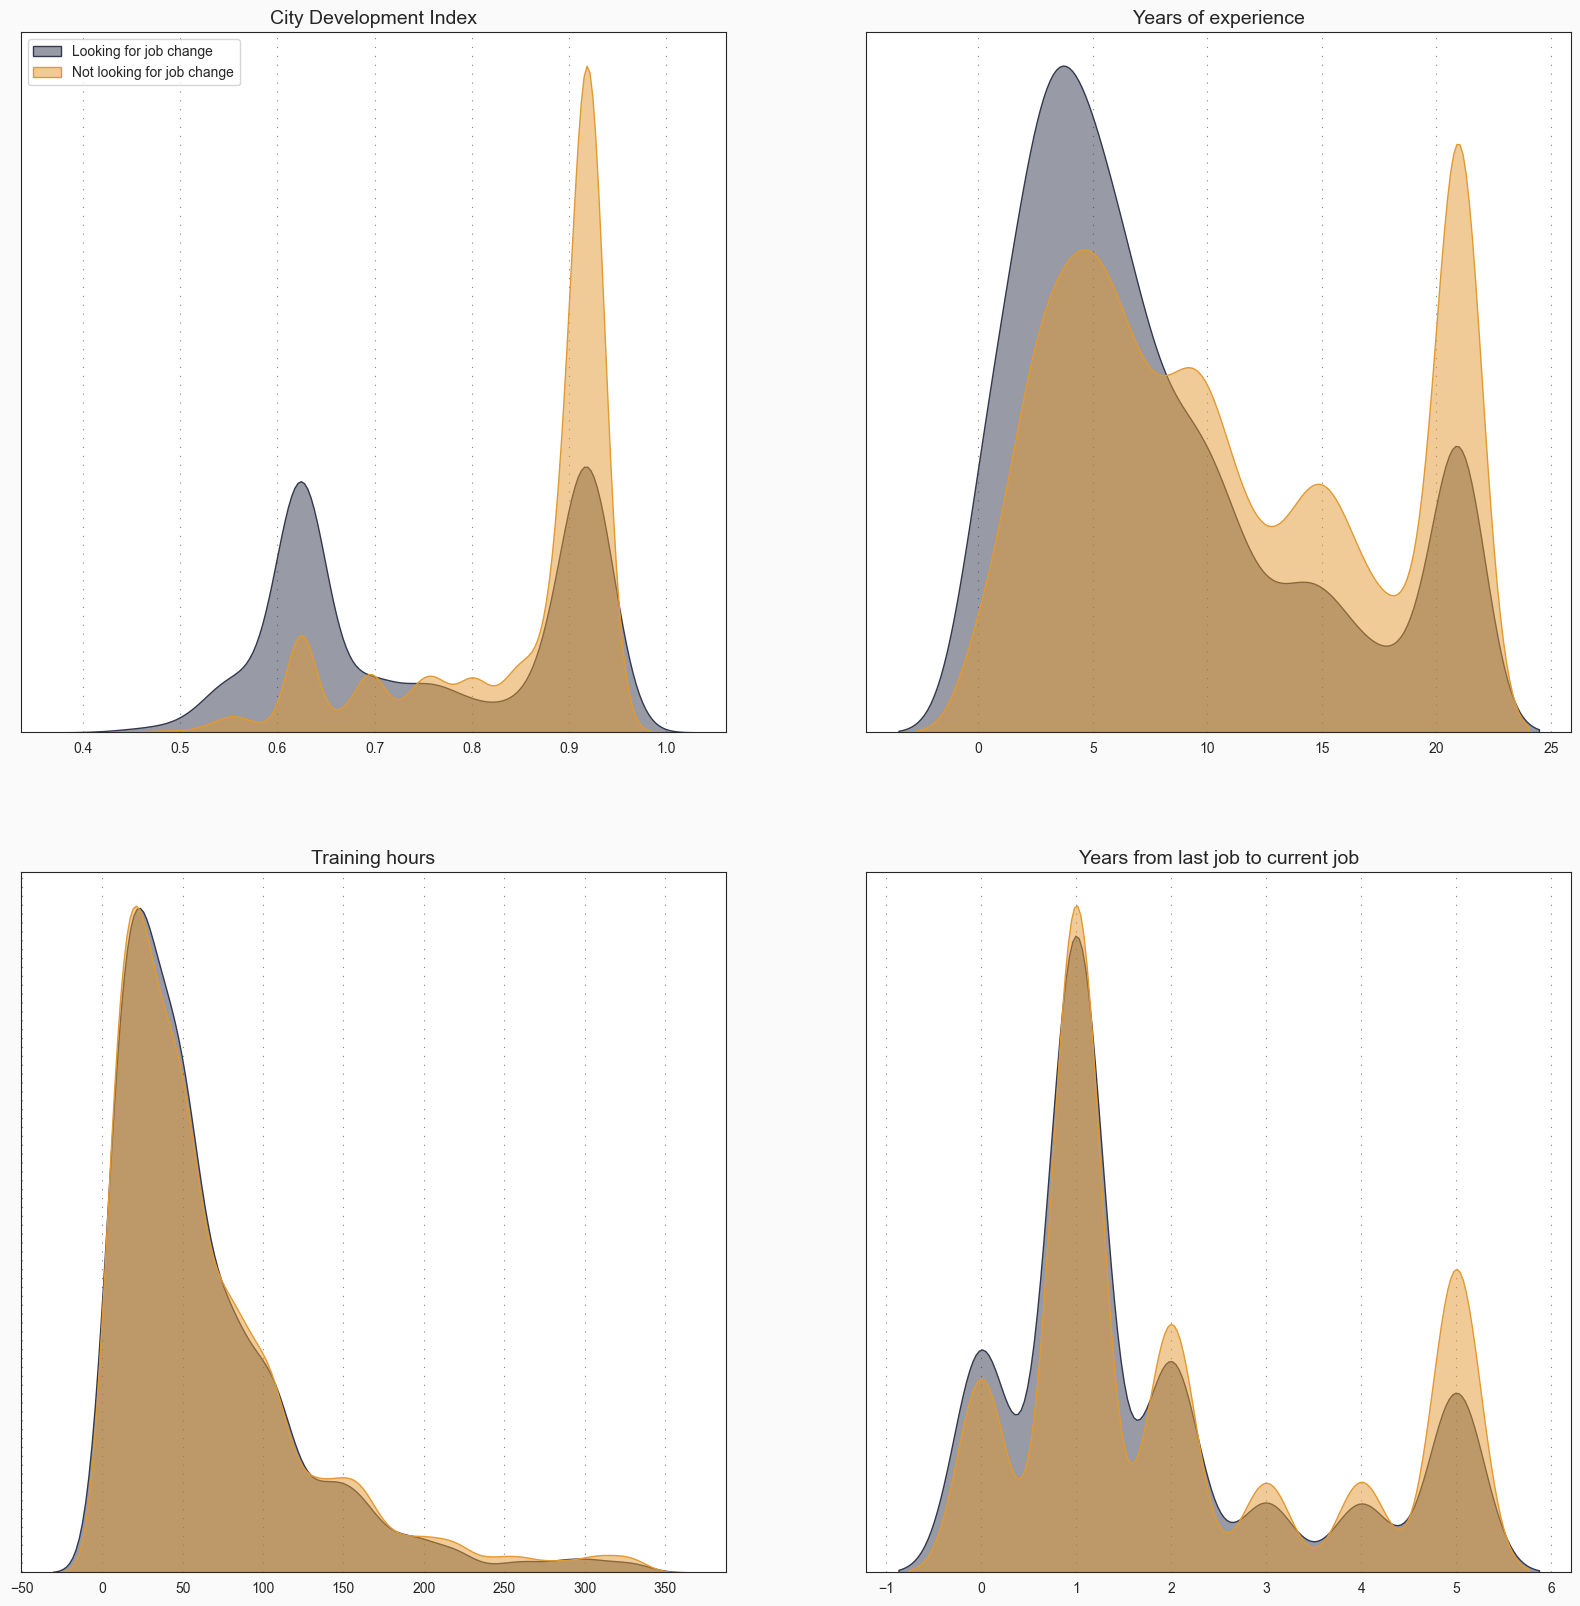

In [271]:
fig = plt.figure(figsize = (20, 20))
fig.patch.set_facecolor('#fafafa')

plt.subplot(221)
sns.set_style('white')
plt.title('City Development Index', size = 14)
sns.kdeplot(df.query('target == "Looking for job change"')['city_development_index'], color = '#32384D', shade = True, label = 'Looking for job change', alpha = 0.5)
sns.kdeplot(df.query('target == "Not looking for job change"')['city_development_index'], color = '#E29930', shade = True, label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])
plt.legend(loc = 'upper left')

plt.subplot(222)
plt.title('Years of experience', size = 14)
sns.kdeplot(exp_no_nan.query('target == "Looking for job change"')['experience'], color = '#32384D', shade = True, label = 'Looking for job change', alpha = 0.5)
sns.kdeplot(exp_no_nan.query('target == "Not looking for job change"')['experience'], color = '#E29930', shade = True, label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

plt.subplot(223)
plt.title('Training hours', size = 14)
sns.kdeplot(df.query('target == "Looking for job change"')['training_hours'], color = '#32384D', shade = True, label = 'Looking for job change', alpha = 0.5)
sns.kdeplot(df.query('target == "Not looking for job change"')['training_hours'], color = '#E29930', shade = True, label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

plt.subplot(224)
plt.title('Years from last job to current job', size = 14)
sns.kdeplot(lastjob_no_nan.query('target == "Looking for job change"')['last_new_job'], color = '#32384D', shade = True, label = 'Looking for job change', alpha = 0.5)
sns.kdeplot(lastjob_no_nan.query('target == "Not looking for job change"')['last_new_job'], color = '#E29930', shade = True, label = 'Not looking for job change', alpha = 0.5)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', zorder = 0,  dashes = (1,7))
plt.ylabel('')
plt.xlabel('')
plt.yticks([])

plt.show()

In [272]:
cs = df.groupby(['target', 'company_size']).agg({'target': 'count'}).rename(columns = {'target': 'count'}).reset_index()

fig = px.sunburst(cs, path = ['target', 'company_size'], values = 'count', color = 'target',
                 color_discrete_map = {'Looking for job change': '#32384D', 'Not looking for job change': '#E29930'},
                 width = 700, height = 700)

fig.update_layout(annotations = [dict(text = 'Affect of company size on the desire to change job', 
                                      x = 0.5, y = 1.1, font_size = 24, showarrow = False, 
                                      font_family = 'Calibri Black',
                                      font_color = 'black')])

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

## **Conclusions of EDA**
1. People with no relevant experience are more inclined to search for a new job.
2. Specialists with graduate education are more likely than others to look for a new job.
3. People who signed up for the full time course are more likely than others to look for a new job.
4. People who have a major discipline STEM (Science, Technology, Engineering and Mathematics) are more likely than others to look for a new job.
5. The CDI (City Development Index) has a big role in the desire to change job: more than half of the specialists with a low CDI are looking for a new job - in cities with a high CDI, which is not strange, the situation is the opposite, more than half of the specialists are not interested in finding a new job.
6. People working in Data Science for the first 8 years are more likely to look for a new job, and more than half of the specialists working in this field for more than 20 years are not looking for a new job.

## **Prepare data for modeling**

In [273]:
df.dropna(inplace = True)

retarget2 = {'Not looking for job change': 0, 'Looking for job change': 1}
df['target'] = df['target'].map(retarget2)

df['experience'] = df['experience'].astype('int')
        
df['last_new_job'] = df['last_new_job'].astype('int')


Some more EDA :) The correlation map was not made earlier, because there were missing values and it was impossible to convert the necessary columns to a numeric format.

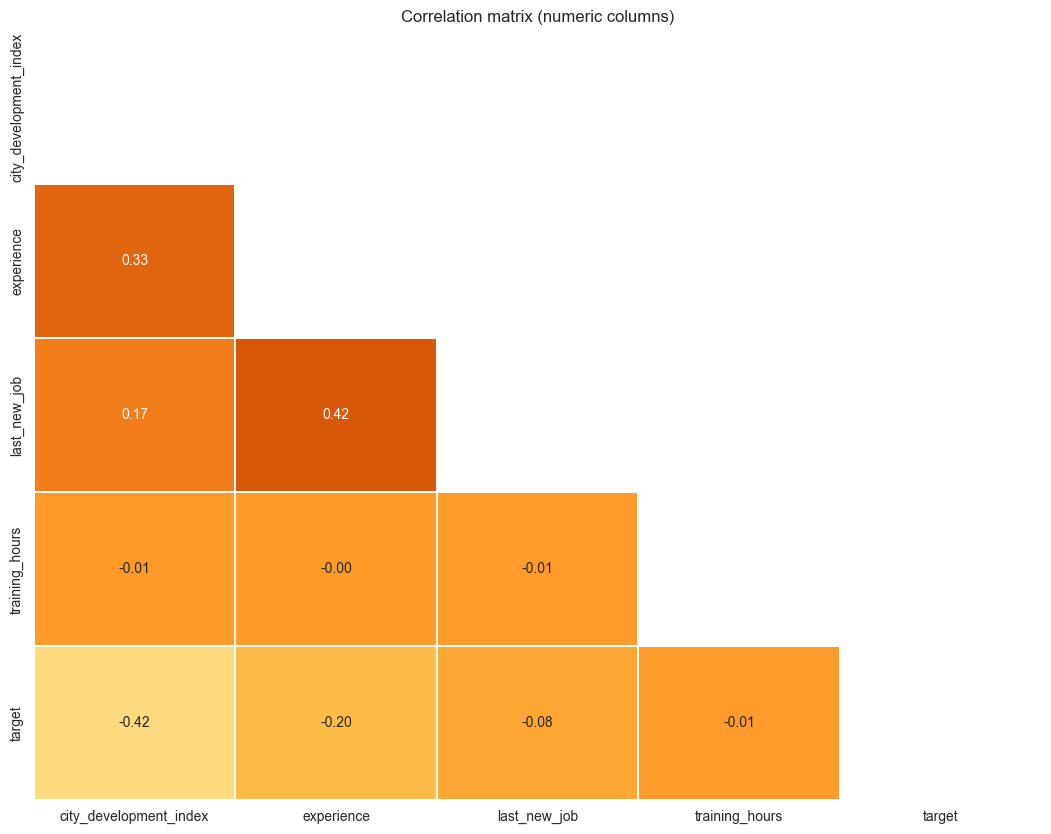

In [274]:
num_df = df.select_dtypes(include=[np.number]).copy()   # hanya kolom numeric
corr = num_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(13,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlOrBr', mask=mask,
            vmin=-1, vmax=1, linewidths=0.1, linecolor='white', cbar=False)
plt.title('Correlation matrix (numeric columns)')
plt.show()

In [276]:
X = df.drop(['target'], axis = 1)
y = df['target']

num_cols = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_cols = X.select_dtypes(include = ['object']).columns.to_list()

def label_encoder(df):
    for i in cat_cols:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

X = label_encoder(X)

X.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1,-0.590248,1,1,2,0,5,0.514004,4,5,1.589117,-0.300090
4,-0.667720,1,0,2,1,5,1.430674,4,1,0.989835,-0.947589
7,-0.710760,1,0,2,0,5,0.208447,7,5,1.589117,-0.781564
8,0.649299,1,0,2,0,5,-0.708223,4,5,-0.808010,-0.316692
11,0.649299,1,0,2,0,5,-1.013779,6,5,-0.808010,0.712665


### Modeling

In [277]:
df['target'].value_counts()

target
0    7472
1    1483
Name: count, dtype: int64

In [278]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

smote = SMOTE()

X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

Y_train_balanced.value_counts()

target
0    5961
1    5961
Name: count, dtype: int64

**For modeling I will use 5 models:**
1. Logistic Regression
2. Random Forest
3. XGBoost
4. LGBM
5. CatBoost

And also I will check Cross-Validation with 5 folds.

In [280]:
results = pd.DataFrame(columns = ['LR', 'RF', 'XGB', 'LGBM', 'CB'], index = range(4))

## **Logistic Regression**

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1511
           1       0.36      0.57      0.44       280

    accuracy                           0.77      1791
   macro avg       0.64      0.69      0.65      1791
weighted avg       0.83      0.77      0.79      1791

ROC AUC score: 0.719

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.786
precision: 0.77
recall: 0.65
f1: 0.7


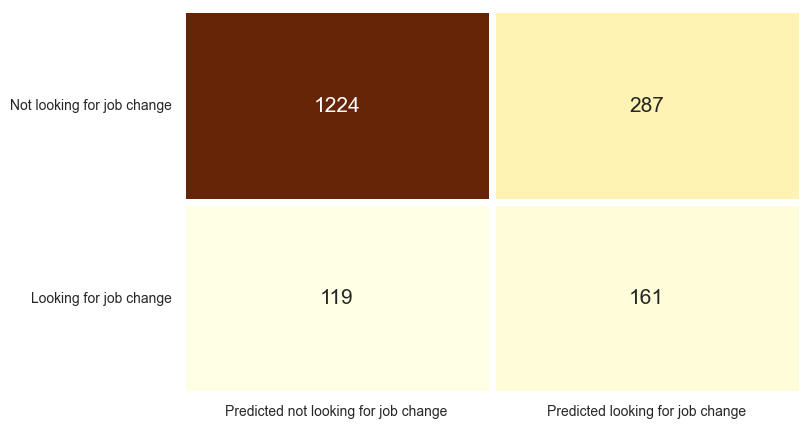

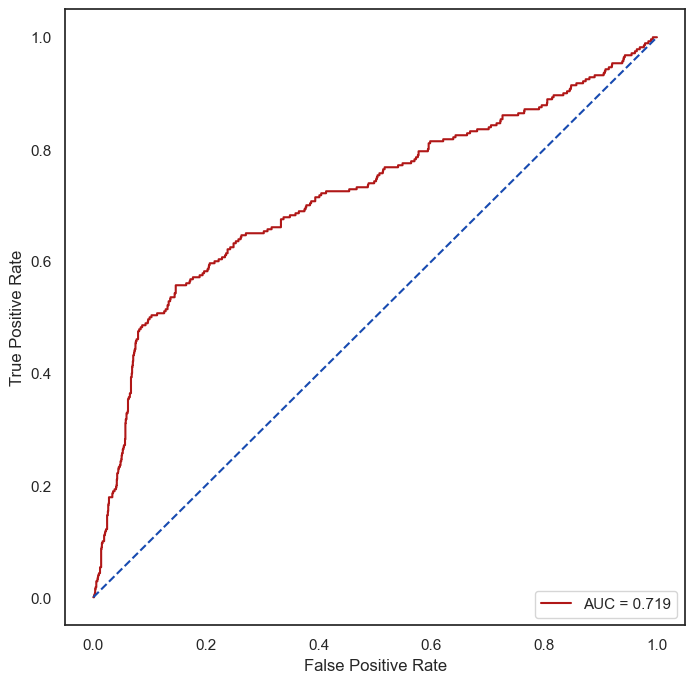

,feature,importance (abs coef)
0,city_development_index,0.900275
2,relevent_experience,0.528363
1,gender,0.444415
4,education_level,0.408936
3,enrolled_university,0.296254
6,experience,0.165009
10,training_hours,0.138653
9,last_new_job,0.137214
7,company_size,0.064603
8,company_type,0.023505


In [282]:
lg = LogisticRegression(random_state=42)
lg.fit(X_train_balanced, Y_train_balanced)
y_pred = lg.predict(X_test)
y_prob = lg.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 0] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 0] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 0] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 0] = round(roc_auc_score(y_test, y_pred), 2)
lg_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lg_cm, cmap = 'YlOrBr', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not looking for job change', 'Looking for job change'], xticklabels = ['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp = pd.DataFrame(columns = ['feature', 'importance (abs coef)'], index = range(11))
for i in range(len(f_imp.index)):
    f_imp.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp['importance (abs coef)'] = abs(lg.coef_)[0]
f_imp = f_imp.sort_values('importance (abs coef)', ascending = False)
f_imp[0:11].style.background_gradient(cmap = 'YlOrBr')

## **Random Forest**

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1511
           1       0.52      0.51      0.52       280

    accuracy                           0.85      1791
   macro avg       0.72      0.71      0.71      1791
weighted avg       0.85      0.85      0.85      1791

ROC AUC score: 0.724

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.859
precision: 0.88
recall: 0.62
f1: 0.73


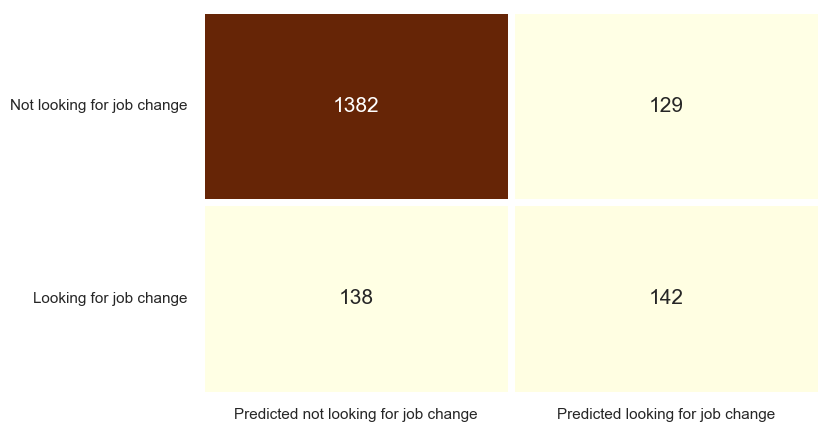

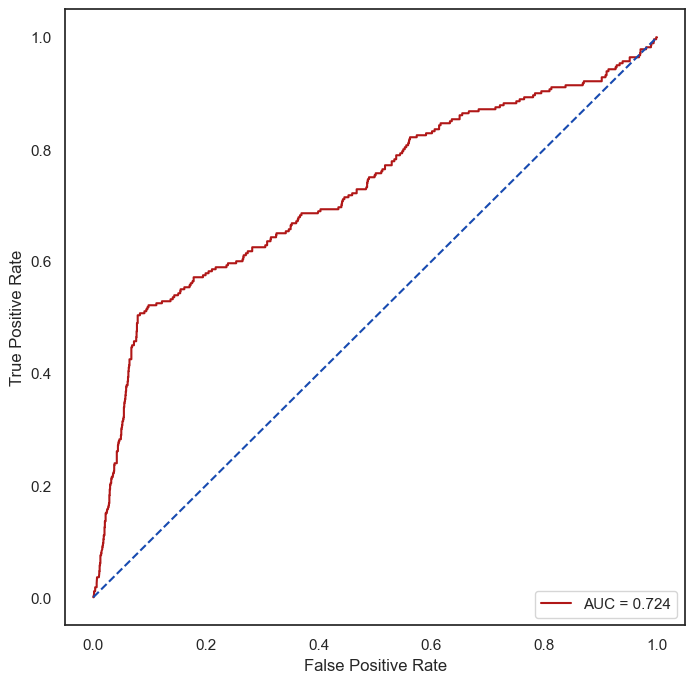

,feature,importance
0,city_development_index,0.636215
6,experience,0.172765
9,last_new_job,0.087244
3,enrolled_university,0.025755
4,education_level,0.024869
10,training_hours,0.017819
7,company_size,0.011470
2,relevent_experience,0.007965
5,major_discipline,0.007884
8,company_type,0.005175


In [283]:
rf = RandomForestClassifier(random_state = 2021, max_depth = 5)
rf.fit(X_train_balanced, Y_train_balanced)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 1] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 1] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 1] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 1] = round(roc_auc_score(y_test, y_prob), 3)
rf_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'YlOrBr', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Not looking for job change', 'Looking for job change'], xticklabels = ['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(11))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp2['importance'] = rf.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:11].style.background_gradient(cmap = 'YlOrBr')

## **XGBoost**

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1511
           1       0.52      0.46      0.49       280

    accuracy                           0.85      1791
   macro avg       0.71      0.69      0.70      1791
weighted avg       0.84      0.85      0.85      1791

ROC AUC score: 0.711

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.943
precision: 0.91
recall: 0.82
f1: 0.84


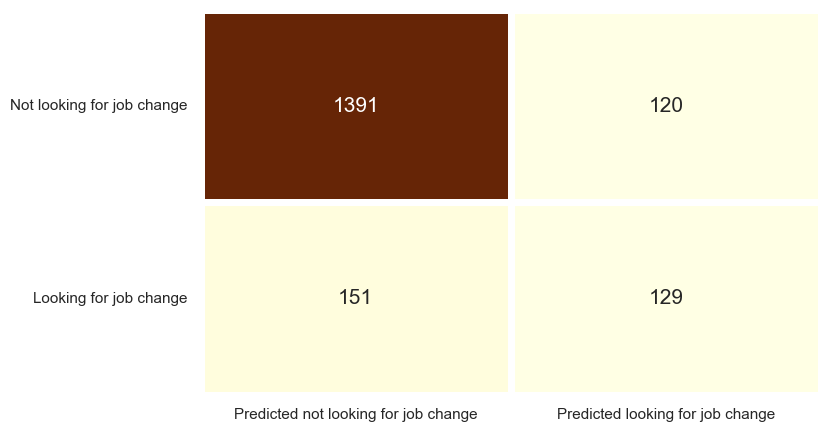

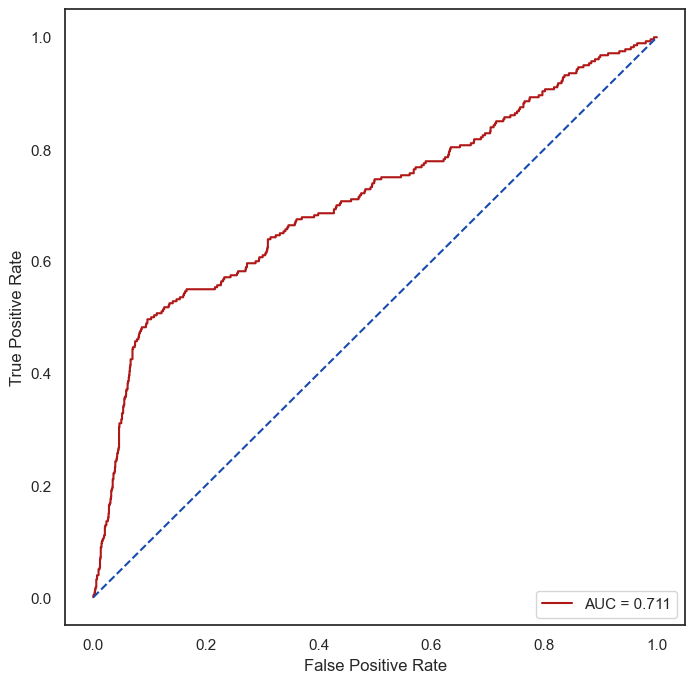

,feature,importance
0,city_development_index,0.301268
9,last_new_job,0.209676
6,experience,0.103803
3,enrolled_university,0.067238
4,education_level,0.054363
8,company_type,0.049851
2,relevent_experience,0.049435
5,major_discipline,0.045264
1,gender,0.042313
7,company_size,0.039234


In [284]:
xgb = XGBClassifier(random_state = 2021, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train_balanced, Y_train_balanced)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 2] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 2] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 2] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 2] = round(roc_auc_score(y_test, y_prob), 3)
xgb_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(xgb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(xgb_cm, cmap = 'YlOrBr', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Not looking for job change', 'Looking for job change'], xticklabels = ['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(11))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp3['importance'] = xgb.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:11].style.background_gradient(cmap = 'YlOrBr')

## **LGBM**

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1511
           1       0.51      0.49      0.50       280

    accuracy                           0.85      1791
   macro avg       0.71      0.70      0.70      1791
weighted avg       0.84      0.85      0.85      1791

ROC AUC score: 0.704

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.935
precision: 0.91
recall: 0.83
f1: 0.85


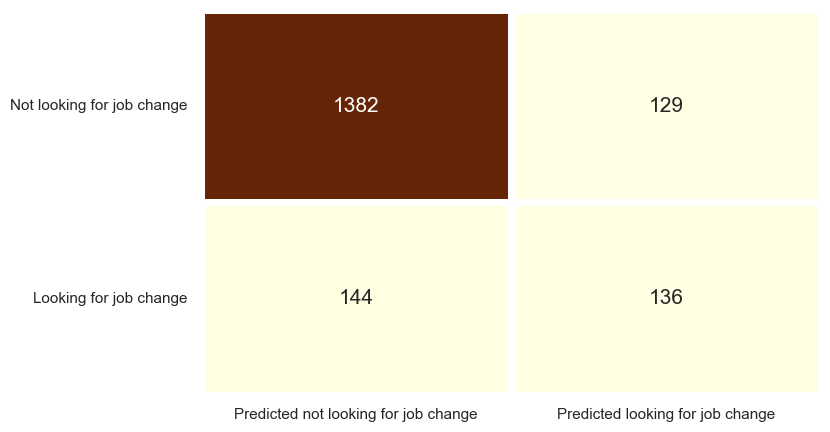

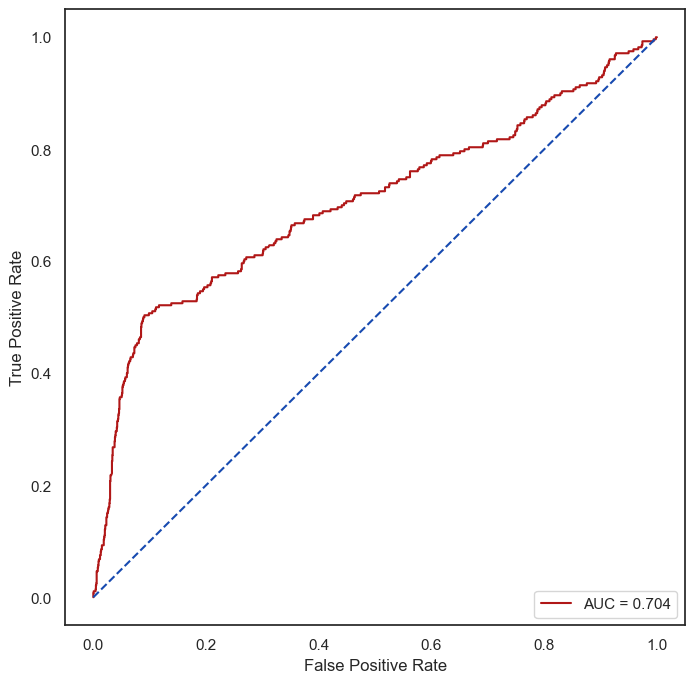

,feature,importance
0,city_development_index,576
6,experience,555
10,training_hours,410
9,last_new_job,361
7,company_size,226
8,company_type,93
3,enrolled_university,87
4,education_level,87
1,gender,39
5,major_discipline,36


In [285]:
lgbm = LGBMClassifier(random_state = 2021, max_depth = 5, num_leaves = 50)
lgbm.fit(X_train_balanced, Y_train_balanced)
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 3] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 3] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 3] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 3] = round(roc_auc_score(y_test, y_prob), 3)
lgbm_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(lgbm, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lgbm, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lgbm, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lgbm, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lgbm_cm, cmap = 'YlOrBr', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Not looking for job change', 'Looking for job change'], xticklabels = ['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp4 = pd.DataFrame(columns = ['feature', 'importance'], index = range(11))
for i in range(len(f_imp4.index)):
    f_imp4.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp4['importance'] = lgbm.feature_importances_
f_imp4 = f_imp4.sort_values('importance', ascending = False)
f_imp4[0:11].style.background_gradient(cmap = 'YlOrBr')

## **CatBoost**

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1511
           1       0.51      0.49      0.50       280

    accuracy                           0.85      1791
   macro avg       0.71      0.70      0.70      1791
weighted avg       0.84      0.85      0.85      1791

ROC AUC score: 0.704

-----------------------------------------------------

Cross-validation scores with 5 folds:

ROC AUC: 0.943
precision: 0.92
recall: 0.82
f1: 0.83


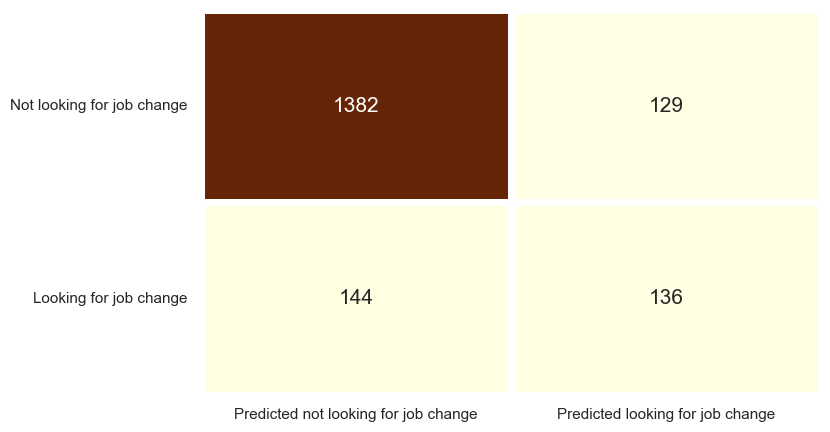

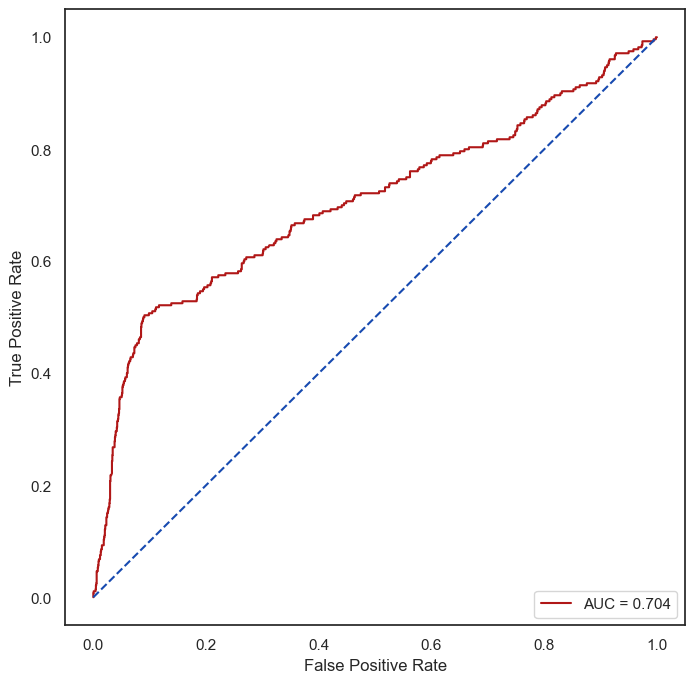

,feature,importance
6,experience,43.815506
9,last_new_job,29.494556
0,city_development_index,17.452735
10,training_hours,3.545232
7,company_size,1.861614
4,education_level,0.851277
8,company_type,0.830385
3,enrolled_university,0.806855
5,major_discipline,0.460417
2,relevent_experience,0.459901


In [286]:
cb = CatBoostClassifier(random_state = 2021, depth = 5, iterations = 500, verbose = False)
cb.fit(X_train_balanced, Y_train_balanced)
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 4] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 4] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 4] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 4] = round(roc_auc_score(y_test, y_prob), 3)
lgbm_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"ROC AUC: {round(cross_val_score(cb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(cb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(cb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(cb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lgbm_cm, cmap = 'YlOrBr', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Not looking for job change', 'Looking for job change'], xticklabels = ['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp5 = pd.DataFrame(columns = ['feature', 'importance'], index = range(11))
for i in range(len(f_imp5.index)):
    f_imp5.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp5['importance'] = cb.feature_importances_
f_imp5 = f_imp5.sort_values('importance', ascending = False)
f_imp5[0:11].style.background_gradient(cmap = 'YlOrBr')